<a href="https://colab.research.google.com/github/ShreshthaJha6/TechnicalResoureces2026/blob/main/HeartFailurePrediction(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HEART FAILURE PREDICTION**

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
      ##sklearn lib from python. Tools for ML and statistical modeling
      ##sklearn.prerprocessing package for common utitlity functions
      ##and transformer classes to change raw feature into a representation
from sklearn.preprocessing import StandardScaler  ##standardises a feature
from sklearn.model_selection import train_test_split ##to split our data in train and test sets.
from sklearn.neighbors import KNeighborsClassifier ##implementing KNN
from sklearn.linear_model import LogisticRegression ##implement LR
from sklearn.metrics import classification_report,confusion_matrix
     ##to measure the quality of prdcns from a classification algorithm.
     ##measures the quality of prdcns from a classification model by checking no. of True and False prdcns.
%matplotlib inline

import os

In [3]:
#import dataset
df = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

In [4]:
df.head()
    ##1st 5 entries from the dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.head().transpose()

,0,1,2,3,4
age,75.0,55.00,65.0,50.0,65.0
anaemia,0.0,0.00,0.0,1.0,1.0
creatinine_phosphokinase,582.0,7861.00,146.0,111.0,160.0
diabetes,0.0,0.00,0.0,0.0,1.0
ejection_fraction,20.0,38.00,20.0,20.0,20.0
high_blood_pressure,1.0,0.00,0.0,0.0,0.0
platelets,265000.0,263358.03,162000.0,210000.0,327000.0
serum_creatinine,1.9,1.10,1.3,1.9,2.7
serum_sodium,130.0,136.00,129.0,137.0,116.0
sex,1.0,1.00,1.0,1.0,0.0


In [6]:
df.info()
     ##info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.describe()
    ##data description

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


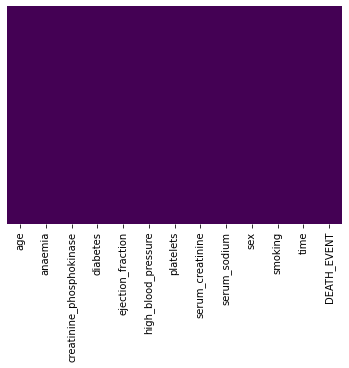

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

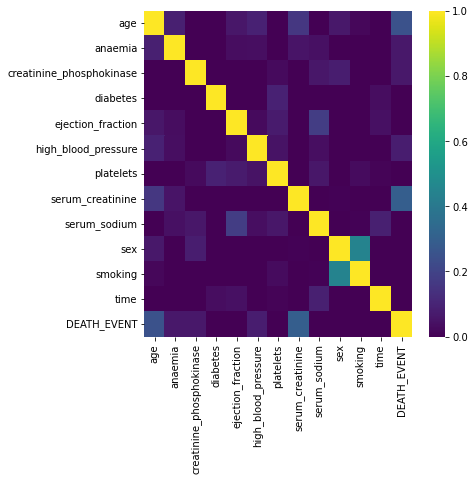

In [10]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),vmin=0,cmap='viridis')

In [11]:
df.corr()[abs(df.corr()['DEATH_EVENT'])>0.1]['DEATH_EVENT']
##shows us the features that have correlation with DEATH_EVENT

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

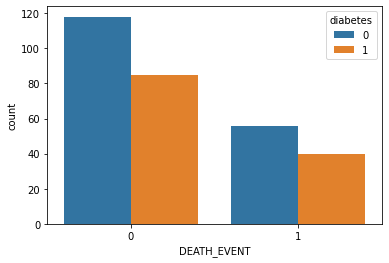

In [12]:
sns.countplot(x='DEATH_EVENT',hue='diabetes',data=df)

In [13]:
print(df['anaemia'].value_counts())

print(df['diabetes'].value_counts())

print(df['smoking'].value_counts())

print(df['high_blood_pressure'].value_counts())

0    170
1    129
Name: anaemia, dtype: int64
0    174
1    125
Name: diabetes, dtype: int64
0    203
1     96
Name: smoking, dtype: int64
0    194
1    105
Name: high_blood_pressure, dtype: int64


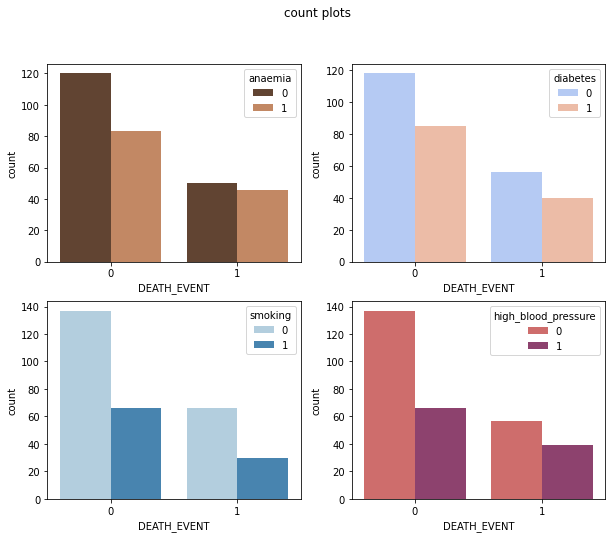

In [14]:
fig, axes = plt.subplots(2,2, figsize=(10,8))

fig.suptitle('count plots')

sns.countplot(ax=axes[0,0],x='DEATH_EVENT',hue='anaemia',data=df,palette='copper')
sns.countplot(ax=axes[0,1],x='DEATH_EVENT',hue='diabetes',data=df,palette='coolwarm')
sns.countplot(ax=axes[1,0],x='DEATH_EVENT',hue='smoking',data=df,palette='Blues')
sns.countplot(ax=axes[1,1],x='DEATH_EVENT',hue='high_blood_pressure',data=df,palette='flare')


In [15]:
df[df['platelets']>600000]['DEATH_EVENT']

105    1
109    0
296    0
Name: DEATH_EVENT, dtype: int64

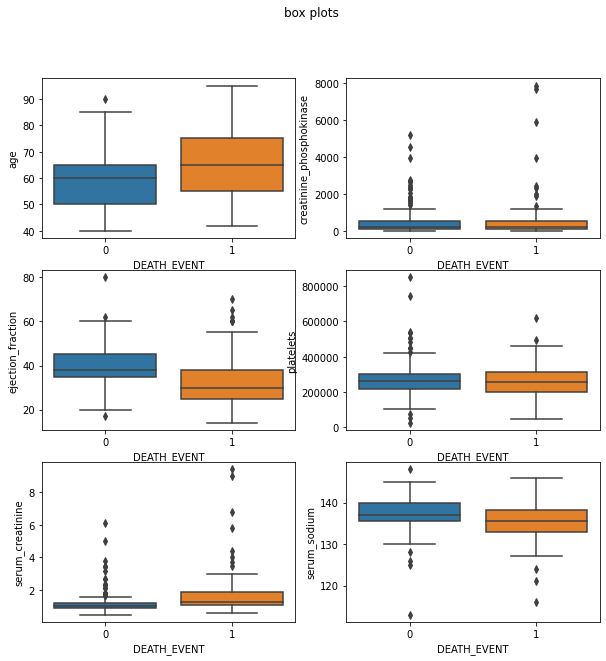

In [16]:
fig, axes = plt.subplots(3,2, figsize=(10,10))

fig.suptitle('box plots')

sns.boxplot(ax=axes[0, 0],x='DEATH_EVENT',y='age',data=df)
sns.boxplot(ax=axes[0, 1],x='DEATH_EVENT',y='creatinine_phosphokinase',data=df)
sns.boxplot(ax=axes[1, 0],x='DEATH_EVENT',y='ejection_fraction',data=df)
sns.boxplot(ax=axes[1, 1],x='DEATH_EVENT',y='platelets',data=df) # is this feature useful in predicting?
sns.boxplot(ax=axes[2, 0],x='DEATH_EVENT',y='serum_creatinine',data=df)
sns.boxplot(ax=axes[2, 1],x='DEATH_EVENT',y='serum_sodium',data=df)

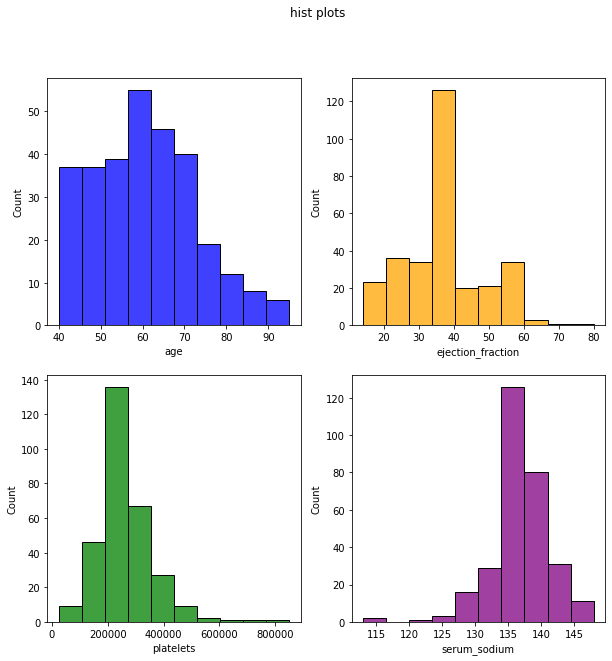

In [59]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

fig.suptitle('hist plots')

sns.histplot(df['age'],ax=axes[0,0],bins=10,color='b')
sns.histplot(df['ejection_fraction'],ax=axes[0,1],bins=10,color='orange')
sns.histplot(df['platelets'],ax=axes[1,0],bins=10,color='g')
sns.histplot(df['serum_sodium'],ax=axes[1,1],bins=10,color='purple')

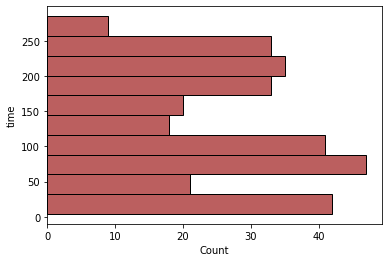

In [56]:
sns.histplot(y='time',data=df,bins=10,color='brown')

**sci-kit learn use.**

In [19]:
x=df[['ejection_fraction','serum_creatinine','serum_sodium','time','age']]
y=df['DEATH_EVENT']

In [46]:
#standardize the data values into a standard format
#removes the mean and scales each feature to unit variance.

scale = StandardScaler()
scale.fit(x)
scaled_feature = scale.transform(x)
x_train, x_test, y_train, y_test = train_test_split(scaled_feature, df['DEATH_EVENT'], test_size=0.30)

**`KNN`**

In [47]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
prdn = knn.predict(x_test)

In [48]:
print(confusion_matrix(y_test, prdn))
print(classification_report(y_test, prdn))

[[54  4]
 [11 21]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        58
           1       0.84      0.66      0.74        32

    accuracy                           0.83        90
   macro avg       0.84      0.79      0.81        90
weighted avg       0.83      0.83      0.83        90



In [49]:
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  prdn_i = knn.predict(x_test)
  error_rate.append(np.mean(prdn_i!=y_test))

Text(0, 0.5, 'Error Rate')

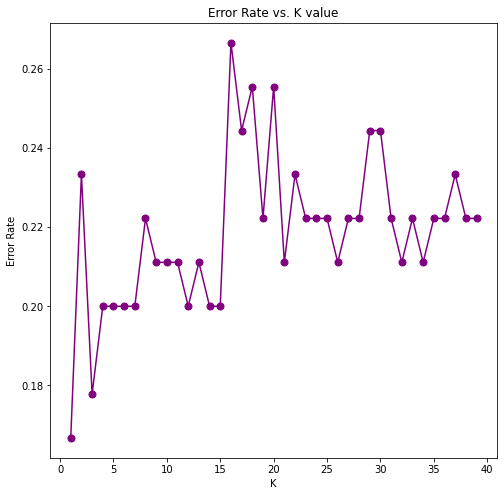

In [50]:
plt.figure(figsize=(8,8))
plt.plot(range(1,40),error_rate,color='purple',linestyle='solid',marker='o',markersize=7)
plt.title('Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [51]:
#with K=19
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print("WITH K=19")
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=19


[[54  4]
 [16 16]]


              precision    recall  f1-score   support

           0       0.77      0.93      0.84        58
           1       0.80      0.50      0.62        32

    accuracy                           0.78        90
   macro avg       0.79      0.72      0.73        90
weighted avg       0.78      0.78      0.76        90



In [54]:
#logistic regression
x_train, x_test, y_train, y_test, = train_test_split(scaled_feature,df['DEATH_EVENT'], test_size=0.30)
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
prediction = logmodel.predict(x_test)

In [55]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[60  7]
 [ 5 18]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        67
           1       0.72      0.78      0.75        23

    accuracy                           0.87        90
   macro avg       0.82      0.84      0.83        90
weighted avg       0.87      0.87      0.87        90

